In [1]:
import rbo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data=pd.read_csv("RBO-Country.csv")

In [4]:
co_rank=data[data['Country']=='COLOMBIA']
ch_rank=data[data['Country']=='CHILE']
us_rank=data[data['Country']=='UNITED STATES']
br_rank=data[data['Country']=='BRAZIL']

In [5]:
countries=['BRAZIL','CHILE','COLOMBIA','UNITED STATES']
p_values=np.arange(0.5, 0.98, 0.01)

In [6]:
rboDF=pd.DataFrame(columns = ['Countries' , 'p', 'RBO'])
for i in range(len(countries)):
    for j in range(len(countries)):
        if i>j:
            for p_val in p_values:
                #print(countries[i]+"-"+countries[j]+","+str(p))
                rbo_ext=rbo.rbo(data[data['Country']==countries[i]]['CODE'], data[data['Country']==countries[j]]['CODE'], p=p_val)
                #rboDF=rboDF.append({'Countries':'CO-CHI','p':0.5,'RBO':99},ignore_index=True)
                rboDF=rboDF.append({'Countries':countries[i]+"-"+countries[j],'p':p_val,'RBO':rbo_ext['ext']},ignore_index=True)
            
        

In [7]:
rbo_ext=rbo.rbo(data[data['Country']==countries[0]]['CODE'], data[data['Country']==countries[1]]['CODE'], p=0.95)
rbo_ext

{'min': 0.5106598186621049,
 'res': 0.15880264594527949,
 'ext': 0.5633892299283085}

In [8]:
rboDF.sample(10)

,Countries,p,RBO
138,COLOMBIA-CHILE,0.92,0.621730
84,COLOMBIA-BRAZIL,0.86,0.496012
82,COLOMBIA-BRAZIL,0.84,0.509583
123,COLOMBIA-CHILE,0.77,0.605856
157,UNITED STATES-BRAZIL,0.63,0.730918
78,COLOMBIA-BRAZIL,0.80,0.536567
231,UNITED STATES-CHILE,0.89,0.627214
201,UNITED STATES-CHILE,0.59,0.790671
75,COLOMBIA-BRAZIL,0.77,0.556394
215,UNITED STATES-CHILE,0.73,0.740261


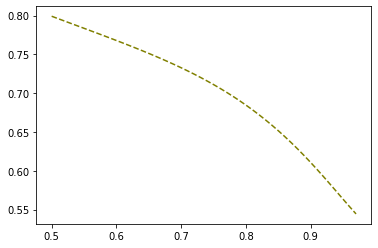

In [9]:
plt.plot( 'p', 'RBO', data=rboDF[rboDF['Countries']=='CHILE-BRAZIL'], color='olive', linestyle='dashed', label=countries[i]+"-"+countries[j])

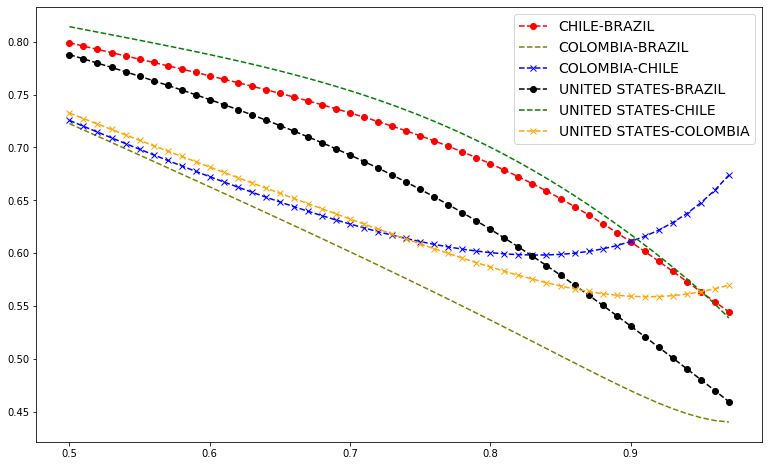

In [22]:
colors=['red','olive','blue','black','green','orange']
markers=['o','','x','o','','x']
plt.figure(figsize=(13,8))
count=0
for i in range(len(countries)):
    for j in range(len(countries)):
        if i>j:
            
            pair=countries[i]+"-"+countries[j]
            plt.plot( 'p', 'RBO', data=rboDF[rboDF['Countries']==pair], marker=markers[count], color=colors[count]
                     , linestyle='dashed', label=pair)
            count=count+1
plt.legend(prop={'size': 14})


In [11]:
rbo.rbo(ch_rank['CODE'], br_rank['CODE'], p=.94)

{'min': 0.5363086904167824,
 'res': 0.11472964633586616,
 'ext': 0.5730681546013467}

In [12]:
res=rbo.rbo(co_rank['CODE'], ch_rank['CODE'], p=.9)
res['ext']

0.6109580155289507

In [13]:
rbo.rbo(co_rank['CODE'], us_rank['CODE'], p=.9)

{'min': 0.5282241340558016,
 'res': 0.05798026647777768,
 'ext': 0.559102421288397}

In [14]:
rbo.rbo(co_rank['CODE'], br_rank['CODE'], p=.9)

{'min': 0.4587350776268616,
 'res': 0.0345023399365221,
 'ext': 0.4697313519195699}

In [15]:
rbo.rbo(ch_rank['CODE'], br_rank['CODE'], p=.9)

{'min': 0.6014953006126541,
 'res': 0.03144701129395276,
 'ext': 0.6106592501249885}

In [16]:
rbo.rbo(ch_rank['CODE'], us_rank['CODE'], p=.9)

{'min': 0.5940403114261721,
 'res': 0.0577746295664224,
 'ext': 0.6175835164655594}

In [17]:
rbo.rbo(br_rank['CODE'], us_rank['CODE'], p=.9)

{'min': 0.5093172689959753,
 'res': 0.05829383057891596,
 'ext': 0.5309269632331374}

In [18]:
rbo.rbo(br_rank['CODE'], us_rank['CODE'], p=.85)

{'min': 0.5725407994644276,
 'res': 0.015390601786518639,
 'ext': 0.5790635102106789}